# Image Processing

- learn image processing with openCV
- HSL:  Hue, Saturation, Lightness
- HSV: Hue, Saturation, Value
- These are color models other than RGB that are more closely how humans see color

RGB model:
- value of RBG that can be represented by a tuple (R,G,B) depending on how we read it,
- cube model.

HSL model:
- cylinder model, height lightness, radius saturation, rotation hue
- HSV is very similar instead of lightness there is a value.

- cvtColor function changes color spaces



In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img  = cv.imread("../Notables/Ewer.webp")
img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
#this will look wierd since the original image was coded in RGB

## Blending and Pasting

> Blending images is done through a weighted function, we have new image pixels = a*p1+b*p2+Y
> If we want image 1 to be more represented give it a higher weight (a)
- addWeighted function will be used

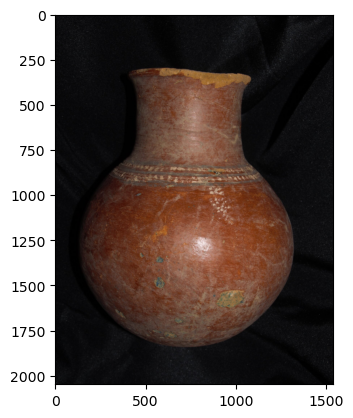

In [ ]:
img1 = cv.imread("../Notables/claypot.jpg")
img1 =  cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img = cv.cvtColor(img,cv.COLOR_HSV2RGB)
plt.imshow(img1)

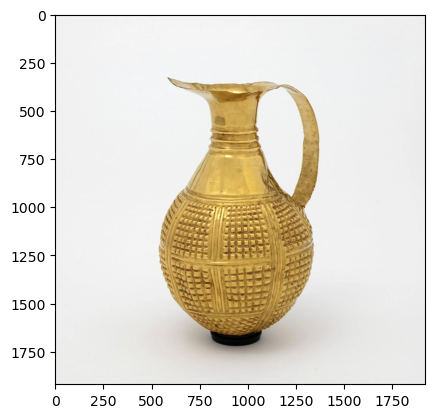

In [ ]:
plt.imshow(img)

### Same Sizes

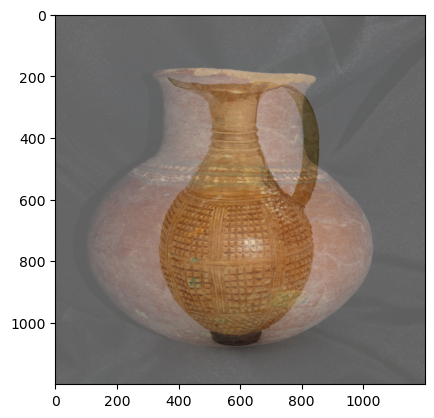

In [ ]:
#Blending images of the same size
img1 = cv.resize(img1, (1200, 1200))
img =  cv.resize(img, (1200, 1200))
#blending the images, img1, value, img2, value, Y
blend =  cv.addWeighted(src1= img1, alpha = .6, src2 = img, beta = .4, gamma = 0)
plt.imshow(blend)

### Different Sizes
- overlay a small image on top of a larger image, (NO blending)
- numpy re-assignment operation

- Blend images of different sizes, addWeighted only works with image of the same size

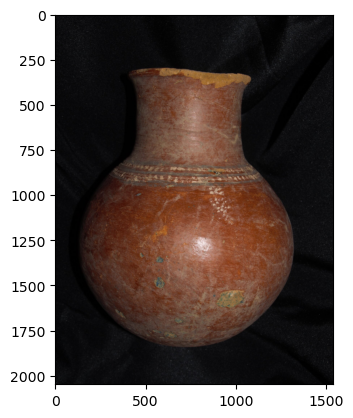

In [ ]:
#Lets re-read the images in
img1 = cv.imread("../Notables/claypot.jpg")
img1 =  cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img  = cv.imread("../Notables/Ewer.webp")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

small_img = cv.resize(img, (600, 600)) #lets make img smaller
large_img = img1

#take a chunk of the larger image and replace them with the smaller image
#take slice of the image array
x_offset = 0
y_offset = 0
x_end = x_offset + small_img.shape[1]  #how wide, taking the #pixels wide
y_end = y_offset + small_img.shape[0]  #how tall

#we are grabbing a chunk of the larger image and replacing it with the values of the smaller image
#from 0 to 600 on the small image rows first hence y first, and 0-600 on the columns hence x
#large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)



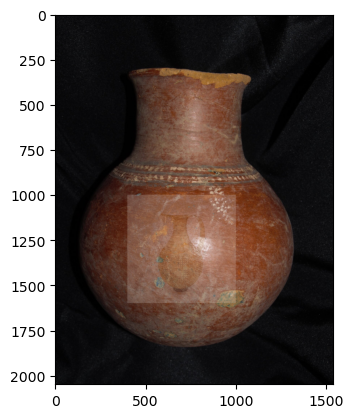

In [ ]:
#lets try to blend images of different sizes using the method above.
#take a slice of the larger image and blend that slize to the smaller image and add that to the larger.

large_slice = large_img[1000:1600, 400:1000]
blended = cv.addWeighted(small_img, .2, large_slice, .8, 0)
large_img[1000:1600, 400:1000] = blended
plt.imshow(large_img)

## Blurring and Soothing

- Common methods for image processing
- smoothing an image can help get rid of noise or help focus on details
- combined with edge detection, edge detection algorithms detect too many edges without blurring
Methods
> - gamma correction, makes an img appear brighter or darker
> - Kernel based filters, kernels are applied over images, [kernels](https://setosa.io/ev/image-kernels/) :Visualization
>   small matrix used to apply affects, here smoothing and blurring.

### Gamma

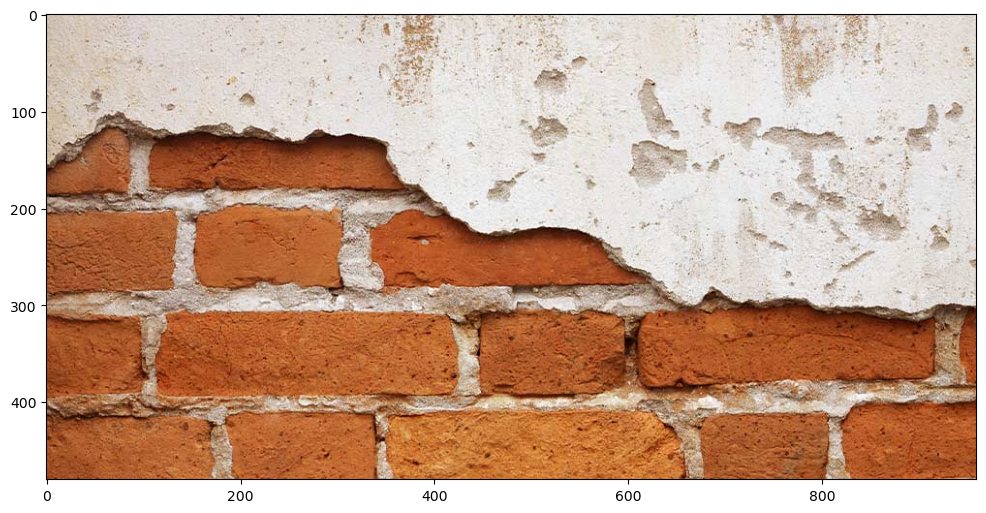

In [ ]:
#lets open the image and perform gamma correction
def load_img():
    img =  cv.imread("../Notables/brick.jpg").astype(np.float32)/255
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img


def display(img):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)
img = load_img()
display(img)     #call display function

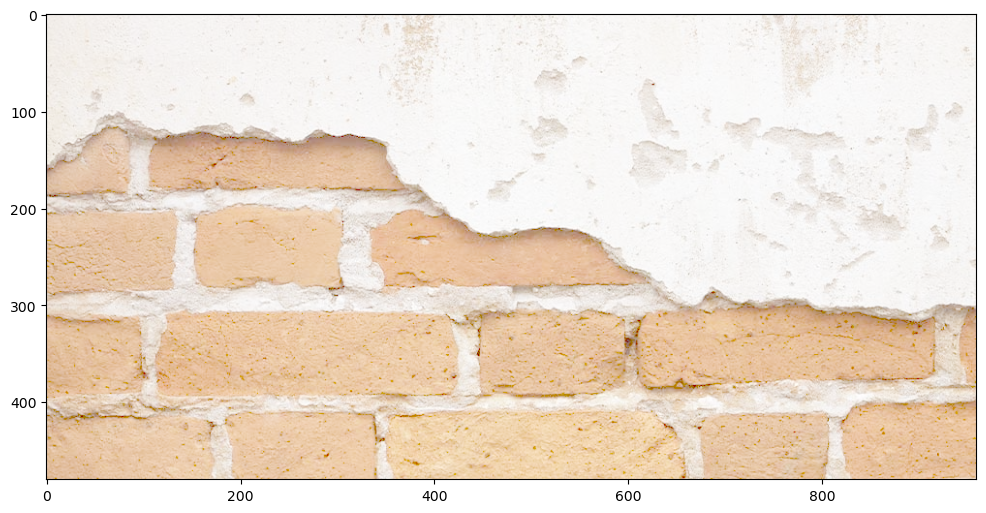

In [ ]:
gamma = 1/4 #gamma value less than 1 will make the image brighter
result = np.power(img, gamma) #take each image and raise it to the power of 1/4
display(result)


### Blurring
- Default cv blur function is cv.blur, takes img and ksize

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


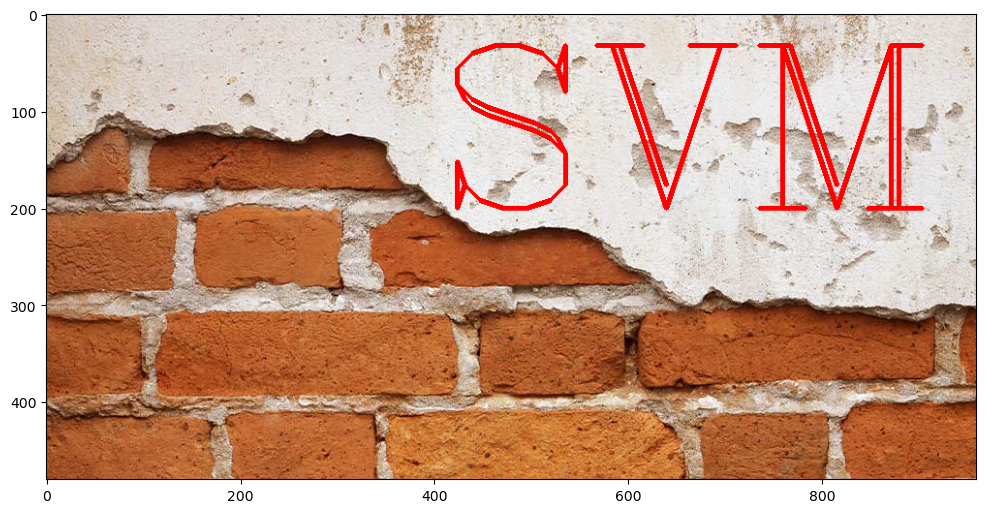

In [ ]:
#blurring, low pass filter with 2d convolution
#lets write text on the image to better show the blurring
def text_img():
    img1 = load_img()
    font = cv.FONT_HERSHEY_COMPLEX
    cv.putText(img1, text = 'SVM', org = (400,200), fontFace = font, fontScale = 8, color= (255, 0, 0), thickness = 3)
    return img1
img1 = text_img()
display(img1)
#the error message given is nothing major, just clipping data that is beyond the range
#the space between the lines during blurring and smoothing will be smoothed or blurred out.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..91.799995].


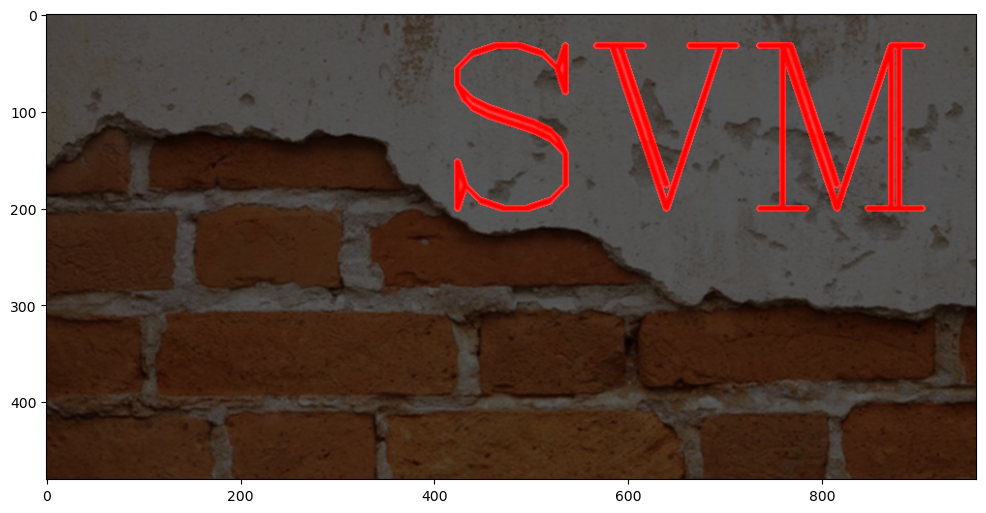

In [ ]:
#What type of kernel will we use? shape? values?
#divided by 25 to make the kernel .04
kernel = np.ones(shape = (3,3), dtype = np.float32)/25
#now apply a 2D filter on the kernel
dst = cv.filter2D(img1, -1, kernel) #image, desired depth -1 output depth same as the input depth
display(dst)

### Smoothing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.02082353..242.29733].


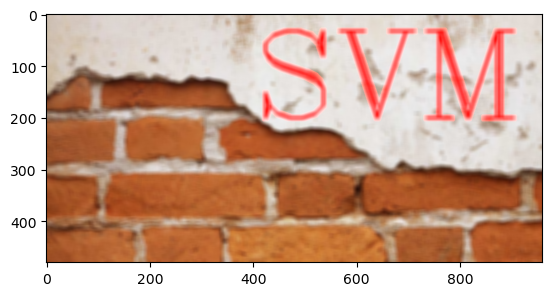

In [ ]:
img1 = text_img()
blurred = cv.blur(img1, ksize = (10,10))
#median blurring and gaussian, takes a group of pixels and calculates the averages for the outputs.
plt.imshow(blurred)

In [ ]:
blurred = cv.GaussianBlur(img1, (5, 5), 10) #parameters, img, ksize, sigma(standard deviation)
blurred = cv.medianBlur(img1, 5) #takes 1 parameter for ksize since it must be square
#median blur is good at removing noise in images


## Morphological Operators

### Erosion
- Morpho operators are sets of kernels that can reduce noise
- Especially good at reducing black points on white background
- Erosion, erodes boundaries of foreground objects
- detect edges between the foreground text and background

In [ ]:
def load_image1():
    blank_image = np.zeros((600,600))
    font = cv.FONT_HERSHEY_SIMPLEX
    cv.putText(blank_image, text = 'Dog' , org = (50,300), fontFace = font, fontScale = 5, color = (255,255,255), thickness = 25)
    return blank_image



def display_img(img):
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap= "gray")

image1 = load_image1()
#display_img(image1)

kernel = np.ones((5,5), dtype = np.uint8)
image2 = cv.erode(image1, kernel, iterations = 4)
#display_img(image2)



### Dialation
- Dialation, Opposite of erosion
- useful in removing background noise
- Opening operator

In [ ]:
image1 = load_image1()
white_noise = np.random.randint(0,2,(600,600)) #create an image of values from 0-1, just white noise.
white_noise*= 255
#plt.imshow(white_noise, 'gray')

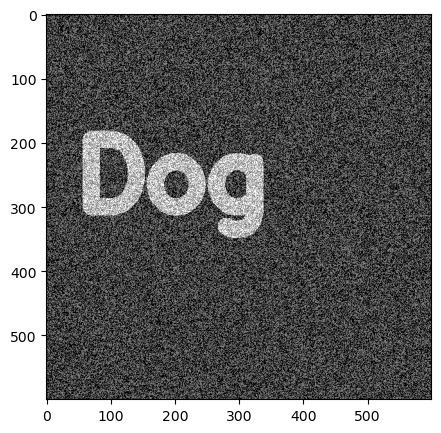

In [ ]:
noise_img = white_noise + image1
display_img(noise_img)

In [ ]:
#clear out the noise without distorting the text
opening = cv.morphologyEx(noise_img, cv.MORPH_OPEN, kernel)
#display_img(opening)

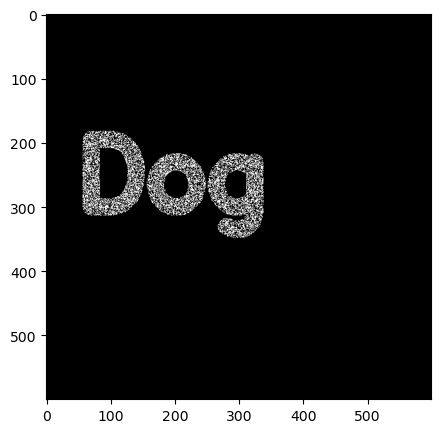

In [ ]:
#forground noise image
image1 = load_image1()
black_noise = np.random.randint(0,2,(600,600))
black_noise *= (-255) #makes the some white down to black and the black to -255

#basically randomly subtracting 255 from pixels in the image and then converting the -255 to 0. leaving just the white letters changed
black_noise_img = image1+black_noise
black_noise_img[black_noise_img == -255] = 0 #convert all the -255s back to 0
display_img(black_noise_img)

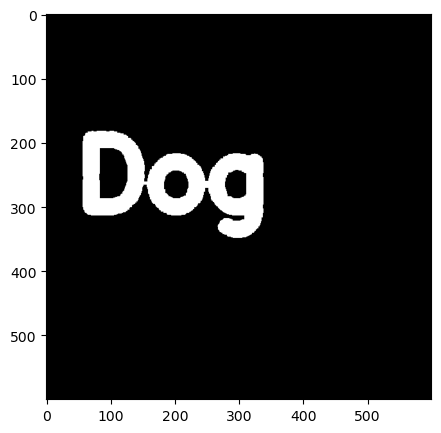

In [ ]:
closing = cv.morphologyEx(black_noise_img, cv.MORPH_CLOSE, kernel)
display_img(closing)

### Gradient

- Difference between the two methods above, takes the edge of the foreground/background
- an image gradient is a directional change in the intensity or color of an image, similar to shading.
- basic Sobel Feldman operators for edge detection
- A normalized x-gradient in the sobel operator, will isolate the vertical features/edges
- A y-gradient will isolate the horizontal edges
- normalized gradient magnitude will show both.



In [ ]:
# def load_image1():
#     blank_image = np.zeros((600,600))
#     font = cv.FONT_HERSHEY_SIMPLEX
#     cv.putText(blank_image, text = 'Dog' , org = (50,300), fontFace = font, fontScale = 5, color = (255,255,255), thickness = 25)
#     return blank_image
#from above
# def display_img(img):
#     fig = plt.figure(figsize=(12,10))
#     ax = fig.add_subplot(111)
#     ax.imshow(img, cmap= "gray")


image1 = load_image1()
#display_img(image1)
gradient = cv.morphologyEx(image1, cv.MORPH_GRADIENT, kernel)
#display_img(gradient)


#### Sobel Operators
- uses two 3x3 kernels
- these are convolved with the original image to calculate approximations of the derivatives, one for horizontal and one for vertical.

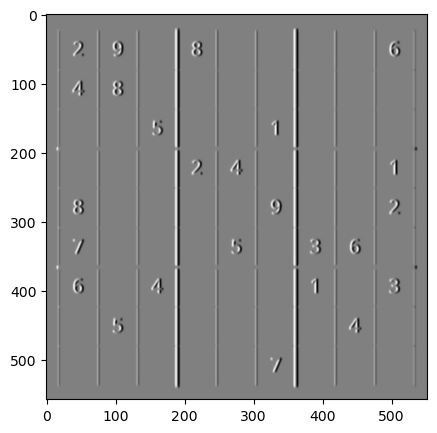

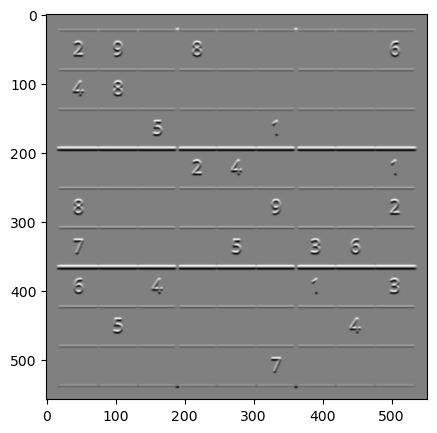

In [ ]:
#using openCV sobel operators
img = cv.imread("../Notables/Sudoku.jpg", 0) #0 means we are reading the image in as grayscale.
#display_img(img)

#lets see the sobel operators
#the second parameter is depth, this is the precision of each pixel, if we want same as input we use -1, otherwise we have 32,64 bit precision
#derivitive in the x direction and y direction parameters 3,4 we
#the we pass in a kernel size

#this is showing sobel operator with dx = 1, and dy = 0, isolating the vertical lines
sobelx = cv.Sobel(img, cv.CV_64F, 1,0, ksize = 5)
display_img(sobelx)

#this is isolating the horizontal lines
sobely = cv.Sobel(img, cv.CV_64F, 0,1, ksize = 5)
display_img(sobely)

#laplacean operator


#### laplacian operator
- Calculus 3 derivitives, second derivitive of x and y

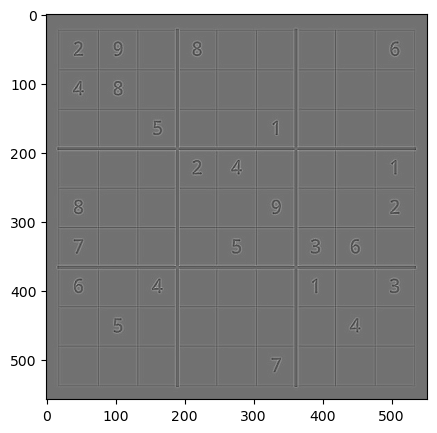

In [ ]:
laplacian = cv.Laplacian(img, cv.CV_64F) #we dont need dx,dy here since we are using both in laplacian
display_img(laplacian) #shows both directional lines.

#### Processing

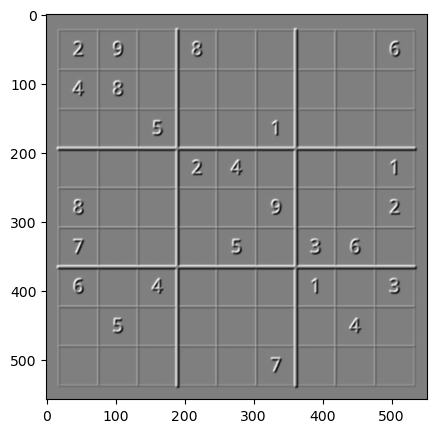

In [ ]:

# Lets blend the Sobel x, y operators together.
sobel_xy = cv.addWeighted(sobelx, .5, sobely, .5, 0) #source 1, weight, source 2, weight, gamma
display_img(sobel_xy)

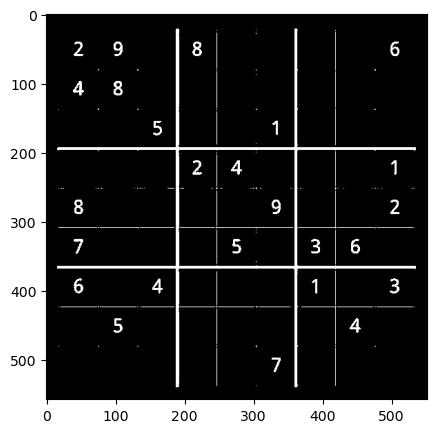

In [ ]:
#applying a threshold on the image
ret, th1 = cv.threshold(img, 100, 255, cv.THRESH_BINARY)
display_img(th1)

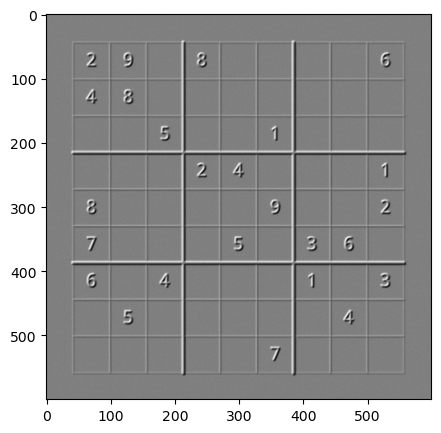

In [ ]:
#lets try applying Dialation to the blended image
white_noise = np.random.randint(0,2, (600, 600))
white_noise *= 255

#since the sobel_xy and white noise are not the same size 558,552 with 600,600, I want to add padding to sobel_x,y
sobel_xy_pad = cv.copyMakeBorder(sobel_xy, 21, 21, 24, 24, cv.BORDER_CONSTANT)
sobel_xy_pad += white_noise




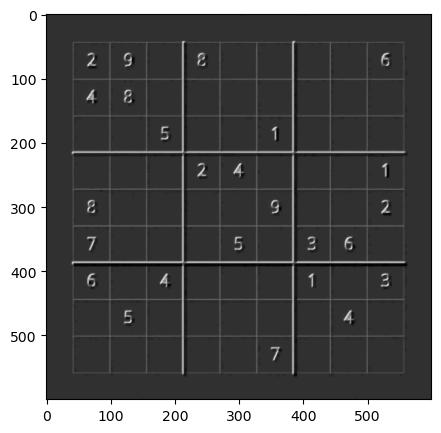

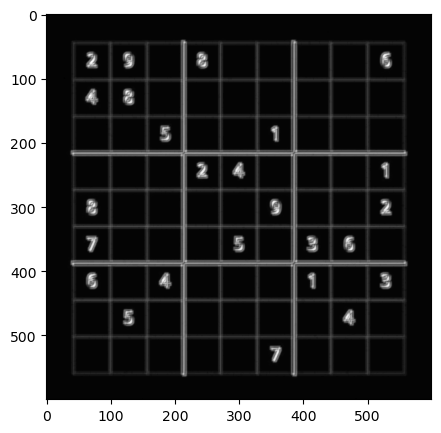

In [ ]:
kernel = np.ones((4,4), np.uint8)
sobel_d = cv.morphologyEx(sobel_xy_pad, cv.MORPH_CLOSE, kernel)
sobel_g = cv.morphologyEx(sobel_xy_pad, cv.MORPH_GRADIENT, kernel)
display_img(sobel_d)
display_img(sobel_g)

## Histograms

- Histogram is a basically a bar chart, similar
- We can display them as a general trend by applying kernel density estimation plot.
- Images, we can display the frequency of the individual colors


In [ ]:
# Create histograms in OpenCV and plt.

#Read in images
green_img = cv.imread("../Notables/green.jpg") #we are using 2 variables for the images. one for showing and another for openCV since the color channels are in different orders
green_show = cv.cvtColor(green_img, cv.COLOR_BGR2RGB)


color_img = cv.imread("../Notables/blue.jpg")
color_show = cv.cvtColor(green_img, cv.COLOR_BGR2RGB)
#color_show = cv.cvtColor(color_img, cv.COLOR_BGR2RGB)



In [ ]:
#getting information for the histograms.
#We need to specify what channel, this is in BGR since RGB
#mask parameter is if we want to apply a mask to part of the image and only calc histogram for that part


#getting the histogram values for the green color in the green image
hist_val_green = cv.calcHist(green_img, channels = [1], mask = None, histSize = [256], ranges = [0,256])
hist_val_blue = cv.calcHist(green_img, channels = [0], mask = None, histSize = [256], ranges = [0,256])
hist_val_red = cv.calcHist(green_img, channels = [2], mask = None, histSize = [256], ranges = [0,256])
hist_val_green.shape

#plt.plot(hist_val_green, color = 'green')


(256, 1)

Text(0.5, 1.0, 'Histogram On Green Image')

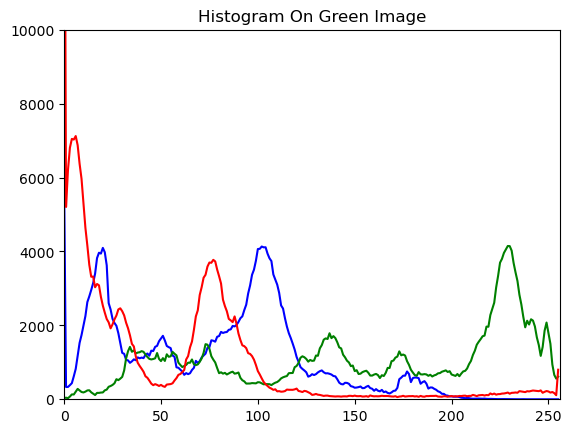

In [ ]:
#Creating a histogram on the green image of colored pencils

#this list tells plt, what color we want to plot each hist values
color = ('b', 'g', 'r')
#enumerate pairs an iterable with index and value, ie. (0,'b')
for i, col in enumerate(color):
    histr = cv.calcHist([green_img], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
    plt.ylim([0,10000])
plt.title("Histogram On Green Image")

Text(0.5, 1.0, 'Histogram On blue Image')

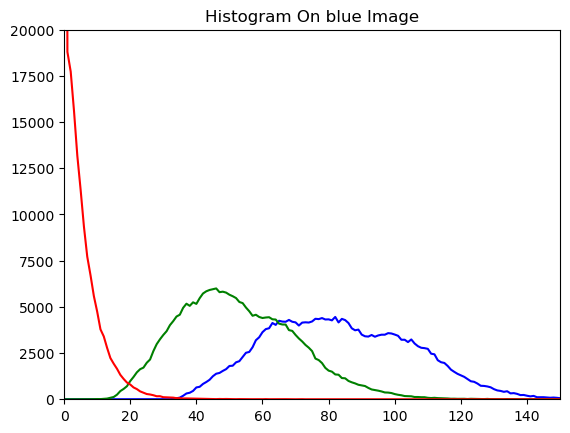

In [ ]:
#Creating a histogram on the blue wall image

for i, col in enumerate(color):
    histr = cv.calcHist([color_img], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,150])
    plt.ylim([0,20000])
plt.title("Histogram On blue Image")


### Histogram pt2
- calculating a histogram based on a region of interest using a mask
- Method of contrast adjustment based on the histogram, increase/decrease contrast based on the image histogram.
- taking the minimum and max values in the image array, we then apply histogram equalization
- These min/max values go to 0 to 255 assuming our image did not have 0 or 255
- make the cumulative histogram linear

#### Masks

In [ ]:

#Reusing the green image from above
green_img = cv.imread("../Notables/green.jpg") #we are using 2 variables for the images. one for showing and another for openCV since the color channels are in different orders
green_show = cv.cvtColor(green_img, cv.COLOR_BGR2RGB)

green_img.shape

(640, 427, 3)

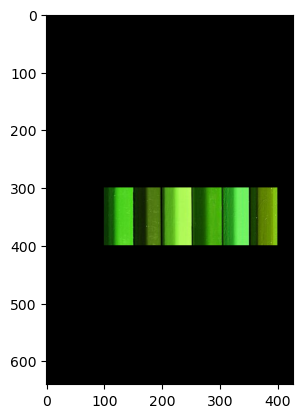

In [ ]:
#lets create a mask
mask = np.zeros(green_img.shape[:2], np.uint8) #creates a mask of the same pixel size as the above img in all black.
#plt.imshow(mask, cmap = 'gray')
#Next we want to get a rectangle as a region of interest
mask[300:400, 100:400] = 255
plt.imshow(mask, cmap='gray')
#this mask
masked_green = cv.bitwise_and(green_img, green_img, mask = mask) #this is the masked calculation on the image
masked_show = cv.bitwise_and(green_img, green_img, mask = mask)
plt.imshow(masked_show)

In [ ]:
#next we can calculate the color histogram masked vales
masked_hist_red = cv.calcHist([green_img], channels = [2], mask = mask, histSize = [256], ranges = [0,256])


Text(0.5, 1.0, 'Red Histogram for masked pencils')

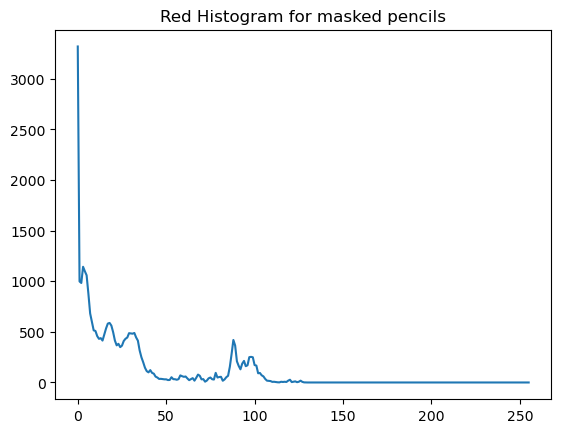

In [ ]:
#lets visualize the difference
plt.plot(masked_hist_red)
plt.title("Red Histogram for masked pencils")


### Histogram Equalization

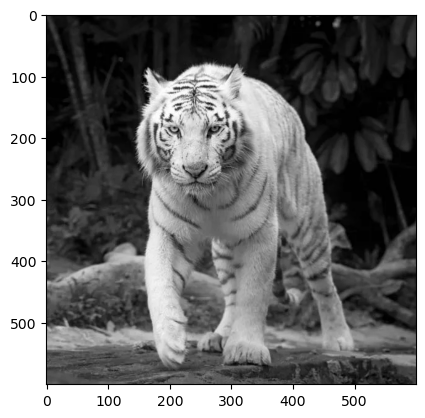

In [ ]:
gorilla_img = cv.imread("../Notables/gorilla.webp", 0) #Initially Read in as Grayscale
#gorilla_show = cv.cvtColor(gorilla_img, cv.COLOR_BGR2RGB)

gorilla_img.shape
plt.imshow(gorilla_img, 'gray')

In [ ]:
#Calculate the histogram
hist_vals = cv.calcHist([gorilla_img], channels=[0], mask = None, histSize=[256], ranges=[0,256]) #Since its a grayscale image we arent focusing on a specific color channel
plt.plot(hist_vals)
plt.title("Grayscale Tiger")




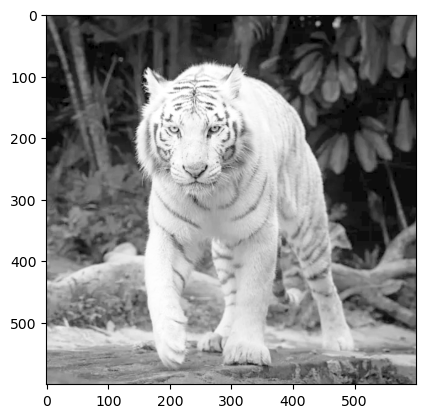

In [ ]:
eq_tiger = cv.equalizeHist(gorilla_img)
plt.imshow(eq_tiger, 'gray')



Text(0.5, 1.0, 'Equalized Tiger Histogram')

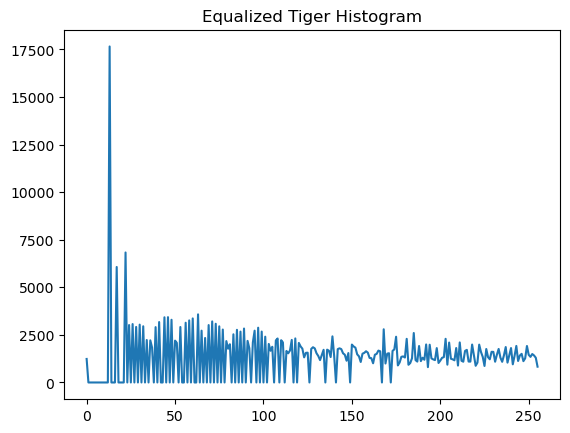

In [ ]:
hist_vals = cv.calcHist([eq_tiger], channels=[0], mask = None, histSize=[256], ranges=[0,256]) #Since its a grayscale image we arent focusing on a specific color channel
plt.plot(hist_vals)
plt.title("Equalized Tiger Histogram")

In [ ]:
#When performing these operations on colored images, we want to change the color order from BGR to HSV and access the value channel
#we then get [:,:,2] is the value channel and perform the equalize operation on it,
#convert the color back and display the equalized color img

## Thresholding

- Converting a grayscale image to only black and white based on a given threshold
- for binary threshold, values above the thresh are turned white, values below are turned black, 0-255 or given max
- Normal thresh number is 127 which is half 255 thus the midpoint


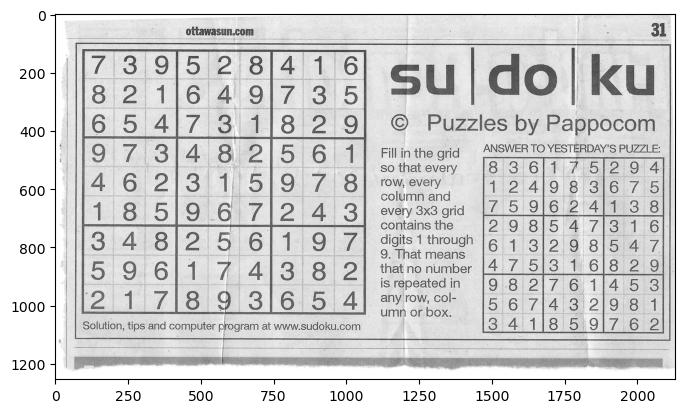

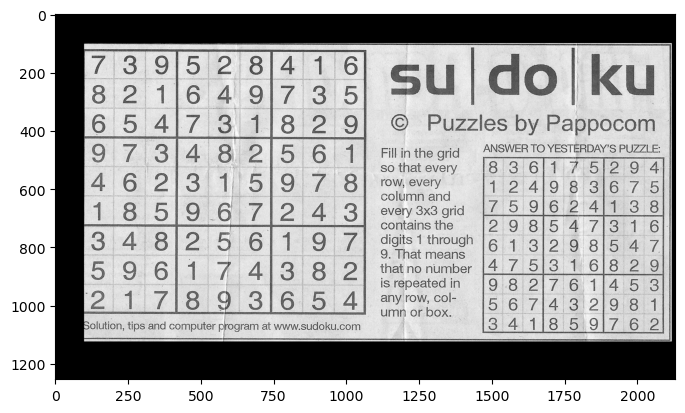

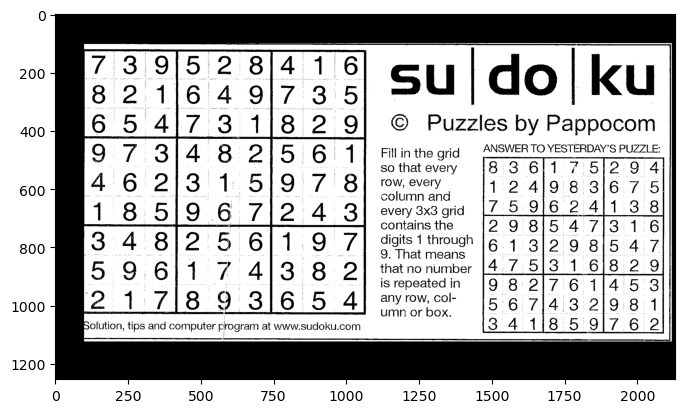

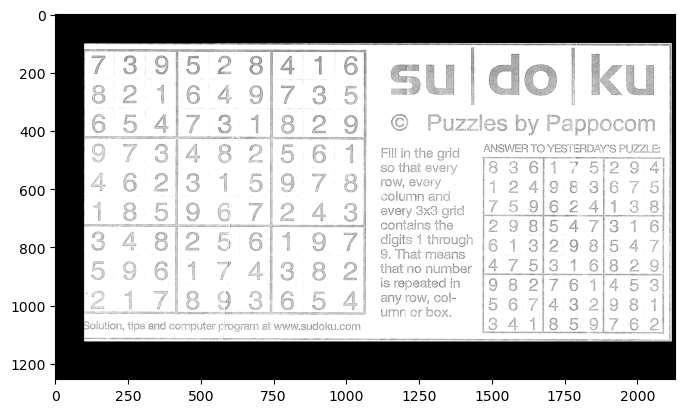

In [ ]:
#Lets read in an image, apply a mask and perform a threshold on the image
#the threshold function in cv does this operation.

#read in an image as grayscale
image = cv.imread("../Notables/Sudoku2.jpg", 0)

#create a image display function
def show_pic(image):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111)
    ax.imshow(image, 'gray')
show_pic(image)

#create a mask
mask = np.zeros(image.shape, image.dtype)
mask[100:1125, 100:2120] = 255

#apply mask to the image, this is a blending method
masked = cv.bitwise_and(image, image, mask = mask)
show_pic(masked)

#apply binary threshold
ret, thresh_masked = cv.threshold(masked, 127, 255, cv.THRESH_BINARY)
show_pic(thresh_masked)

#apply Truncated threshold
ret, thresh_masked = cv.threshold(masked, 127, 255, cv.THRESH_TRUNC)
show_pic(thresh_masked)

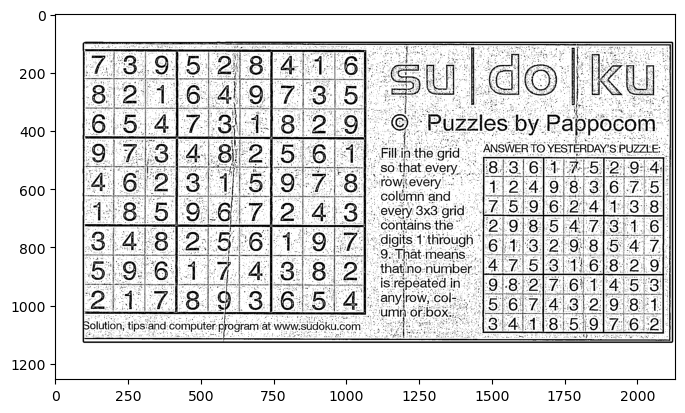

In [ ]:
# adaptive threshold, Tries to adapt the threshold where the gray is around the characters
# we dont need to take two outputs
#The parameters: image, max thresh, mean thresh, thresh type, neighborhood size, constant from the mean
#adaptive thresholding looks at the pixel neighbors to see what value they should be
th2  =  cv.adaptiveThreshold(masked, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 8)
show_pic(th2)

## Testing

### 1010 Testing

In [ ]:
#create an image with text
canvas = np.zeros((600,600))
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(canvas, text = "1010", org = (150,350), fontFace = font, fontScale = 4, color = (255,255,255), thickness = 30)



#I want to blur the image, apply black noise to the artifact, use morph gradient to isolate the edges
# create a kernel for the blurring and noise.

kernel = np.array((5,5), dtype = np.uint8) #Define a kernel of 5x5

canvas_blur = cv.blur(canvas, kernel) #using blur function on the image

canvas_grad1 = cv.morphologyEx(canvas_blur, cv.MORPH_GRADIENT, kernel) #testing morph operator gradient that combines erosion and dialation difference

canvas_grad2 = cv.morphologyEx(canvas, cv.MORPH_GRADIENT, kernel) #testing it on the original image instead of the blurred image

black_noise = np.random.randint(0,2,(600,600)) #create an image of values from 0-1, just white noise.
black_noise *= -255 #bring 1 down to -255
canvas_noise = canvas_blur + black_noise #brings some of the white pixels down to 0
#noise_img = pot_grad + white_noise
canvas_noise[canvas_noise == -255] = 0  #return the -255s to 0



def image_show(img):
    fig = plt.figure(figsize= (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, 'gray')

# image_show(canvas)
# image_show(canvas_noise)
# image_show(canvas_grad1)
# image_show(canvas_grad2)




### Image Processing Review/Testing

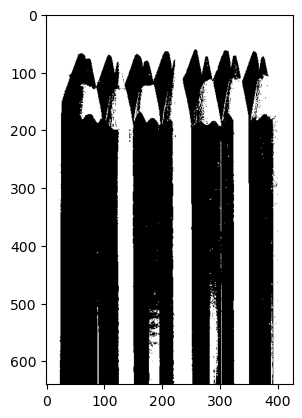

In [ ]:
#final testing and review for image processing


#first open an Image
image = cv.imread("../Notables/green.jpg", 0)

#apply binary threshold
ret, image = cv.threshold(image, 127, 255, cv.THRESH_BINARY)
plt.imshow(image, 'gray')


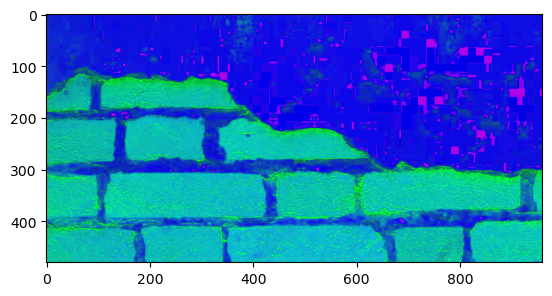

In [ ]:
image = cv.imread("../Notables/brick.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
plt.imshow(image)

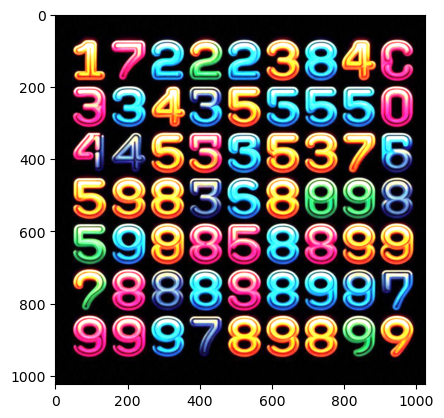

In [ ]:
#create a low pass filter 4x4 kernel with values of .1, then use 2d convolution to blur in normal rgb
image = cv.imread("../Notables/colorNumbers.jfif")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)


kernel = np.ones((4,4), dtype = np.uint8)/10
image = cv.filter2D(image, -1, kernel)
plt.imshow(image)